In [1]:
import os
import cv2
from tensorflow.keras.callbacks import TensorBoard
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from IPython.display import display, Image
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [2]:

# Function to load and preprocess images
def load_and_preprocess_data(data_dir, image_size):
    images = []
    labels = []

    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            for file_name in os.listdir(class_path):
                file_path = os.path.join(class_path, file_name)
                image = cv2.imread(file_path)
                image = cv2.resize(image, (image_size, image_size))
                images.append(image)
                labels.append(class_name)

    # Convert images and labels to NumPy arrays
    images = np.array(images)
    labels = np.array(labels)

    # Convert labels to numerical format
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    labels = to_categorical(labels)

    return images, labels, label_encoder

In [3]:
train_dir = './augmented_data/train'
test_dir =  './augmented_data/validation'

# Define the image size 
image_size = 128

# Load and preprocess training data
X_train, y_train, label_encoder = load_and_preprocess_data(train_dir, image_size)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Load and preprocess testing data
X_test, y_test, label_encoder_test = load_and_preprocess_data(test_dir, image_size) 

random images from the training dataset


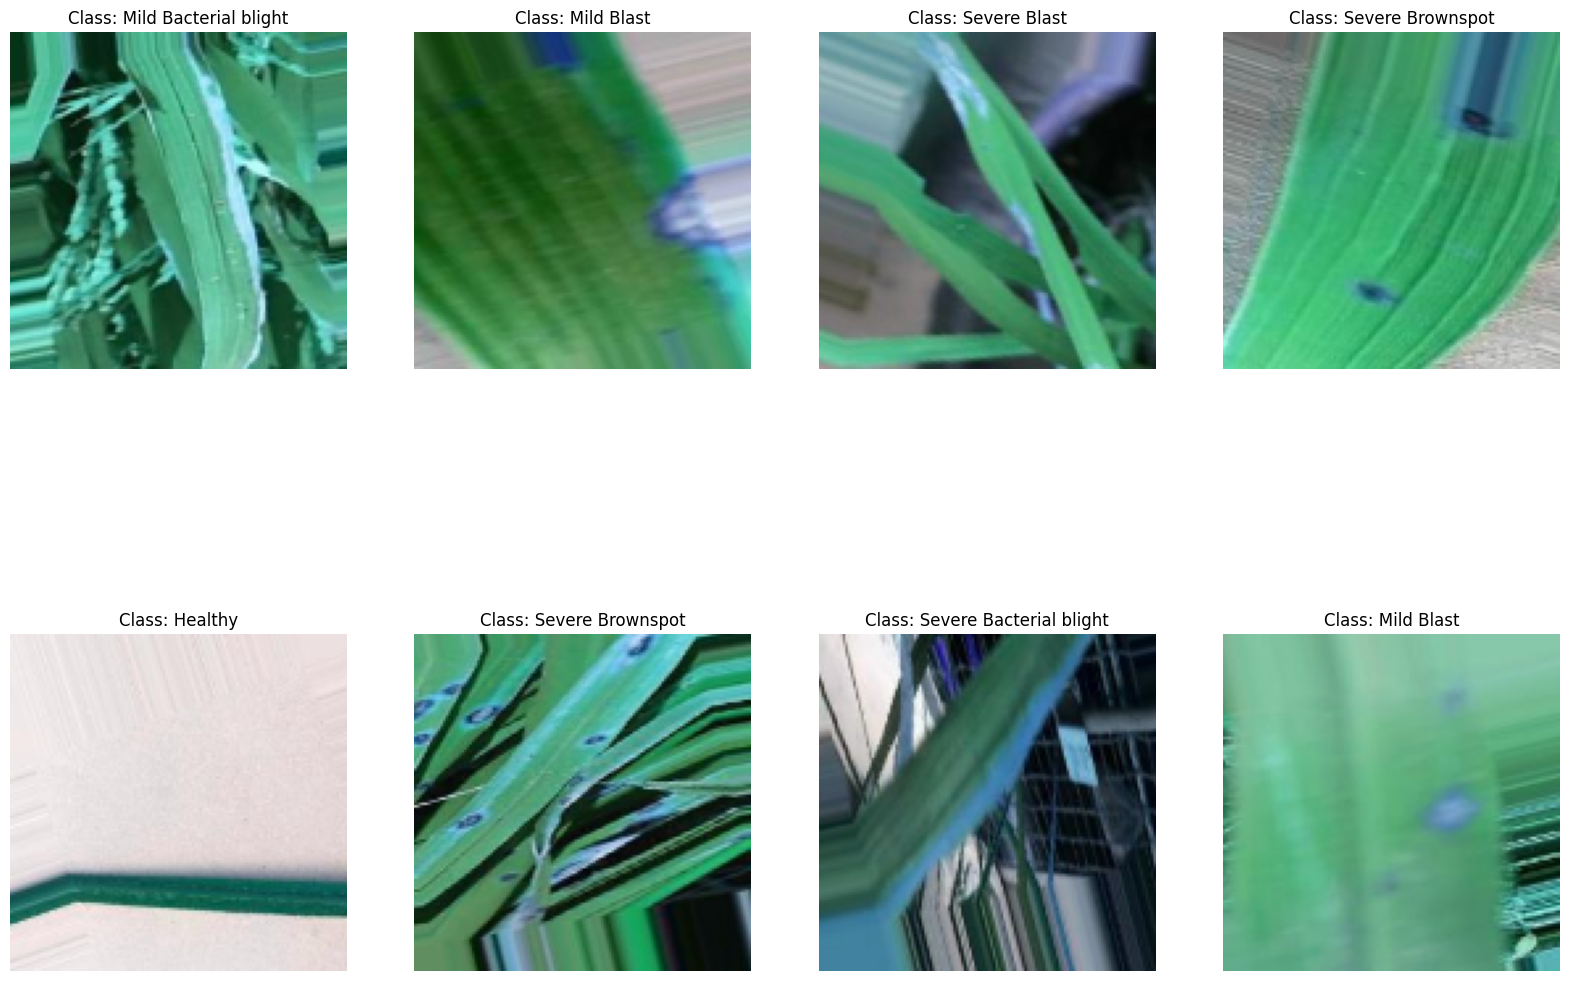

random images from the testing dataset


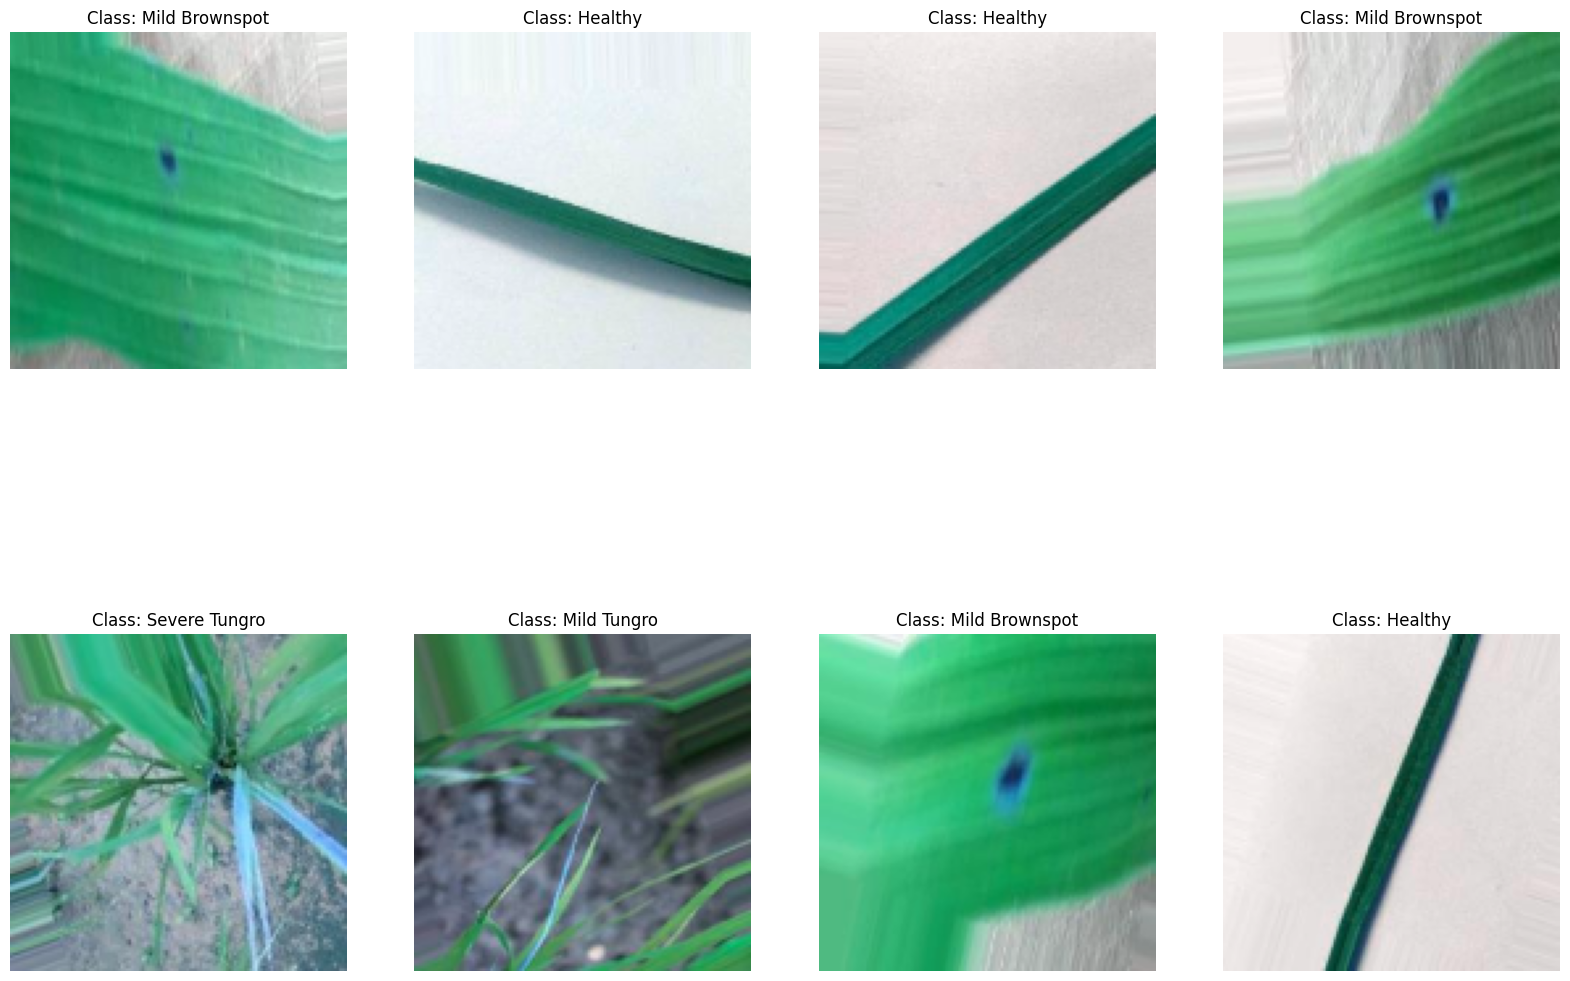

In [4]:

# Function to display randomly selected images using matplotlib
def display_random_images(images, labels, class_names, label_encoder, num_images=8):
 
    num_images_per_row =4
    num_rows = 2 
    indices = np.random.choice(len(images), num_images_per_row * num_rows, replace=False)
    class_names = label_encoder.classes_
    plt.figure(figsize=(20, 15))

    for i, idx in enumerate(indices):
        plt.subplot(num_rows, num_images_per_row, i % (num_images_per_row * num_rows) + 1)
        plt.imshow(images[idx].astype(np.uint8))
        plt.title(f"Class: {class_names[labels[idx].argmax()]}")
        if (i + 1) % num_images_per_row == 0:
            plt.subplots_adjust(hspace=0.09)
        plt.axis('off')

    plt.show()

# Display random images from the training dataset
print("random images from the training dataset")
display_random_images(X_train, y_train, label_encoder.classes_, label_encoder)

# Display random images from the testing dataset
print("random images from the testing dataset")
display_random_images(X_test, y_test, label_encoder.classes_, label_encoder)




Epoch 1/20


328/328 [==============================] - 101s 299ms/step - loss: 1.6185 - accuracy: 0.5046 - val_loss: 1.1202 - val_accuracy: 0.5728
Epoch 2/20
328/328 [==============================] - 100s 305ms/step - loss: 0.8573 - accuracy: 0.6854 - val_loss: 1.0169 - val_accuracy: 0.6519
Epoch 3/20
328/328 [==============================] - 106s 324ms/step - loss: 0.6760 - accuracy: 0.7519 - val_loss: 0.6055 - val_accuracy: 0.7749
Epoch 4/20
328/328 [==============================] - 101s 309ms/step - loss: 0.5059 - accuracy: 0.8122 - val_loss: 0.6973 - val_accuracy: 0.7581
Epoch 5/20
328/328 [==============================] - 100s 306ms/step - loss: 0.4427 - accuracy: 0.8353 - val_loss: 0.4425 - val_accuracy: 0.8460
Epoch 6/20
328/328 [==============================] - 101s 307ms/step - loss: 0.3645 - accuracy: 0.8712 - val_loss: 0.4058 - val_accuracy: 0.8601
Epoch 7/20
328/328 [==============================] - 102s 310ms/step - loss: 0.3219 - accuracy: 0.8806 - val_loss: 0.3

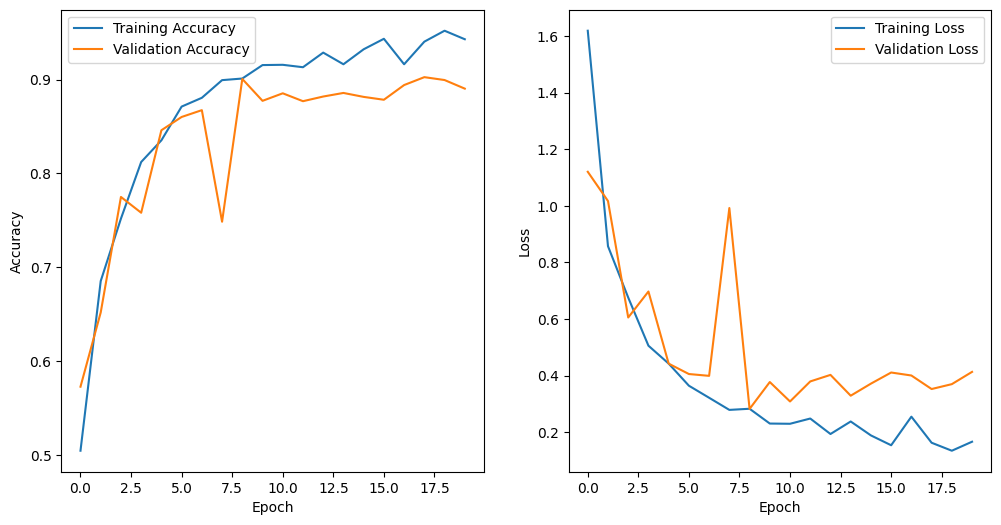

In [5]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))  # Output layer with 9 units
    return model

# Define the image size 
image_size = 128
num_classes = 9  # Number of output classes

# Create and compile the model
model = create_model((image_size, image_size, 3), num_classes)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Function to plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot training history
plot_training_history(history)
